# Elisa Y3 Eval - Visualization of length ratios

In [8]:
from pathlib import Path

from matplotlib import pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib import cm
import numpy as np
plt.style.use('seaborn-deep')
params = {'legend.fontsize': 18,
          'figure.figsize': (15.0, 8.0),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':15,
         'ytick.labelsize':15,
         'font.size': 18}
plt.rcParams.update(params)

import pandas as pd

In [2]:
!ls elisa-y3-eval/*.ratio.tsv

elisa-y3-eval/il10.ratio.tsv  elisa-y3-eval/il9.ratio.tsv


In [3]:
il9 = pd.read_csv('elisa-y3-eval/il9.ratio.tsv', sep='\t', header=0)
il10 = pd.read_csv('elisa-y3-eval/il10.ratio.tsv', sep='\t', header=0)
print('Eval set size: il9, il10 ::', len(il9), len(il10))
il9.keys(), il10.keys()

Eval set size: il9, il10 :: 11675 14364


(Index(['combo3', 'isi-sbmt-v5-small-mixed', 'nd-hiero-s7', 't2t-lgb-v4',
        't2t-lgbxv-v5', 'uw-tfm-6'],
       dtype='object'),
 Index(['combo3', 'isi-sbmt-v4-mixed', 'nd-hiero-s7', 'nd-moses-v6',
        'nd-nmt_lex', 't2t-lgb-v5', 't2t-xuroman-lgb-v5'],
       dtype='object'))

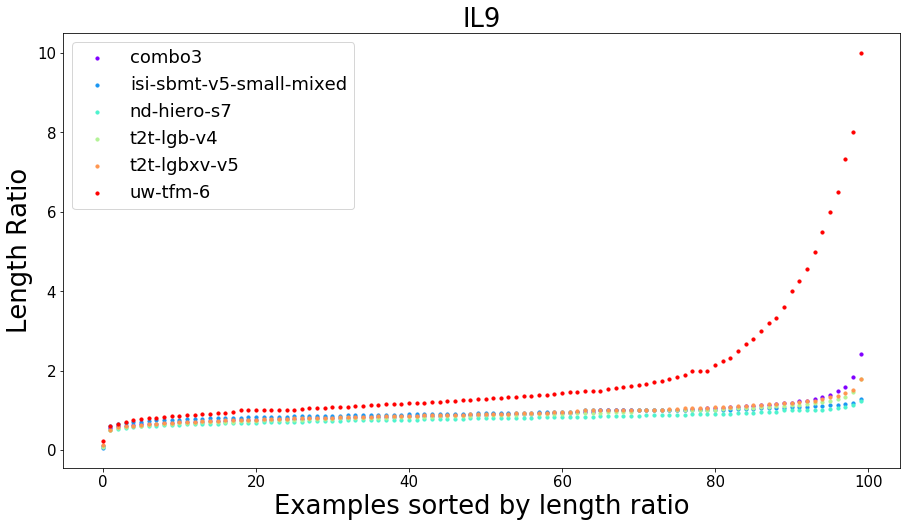

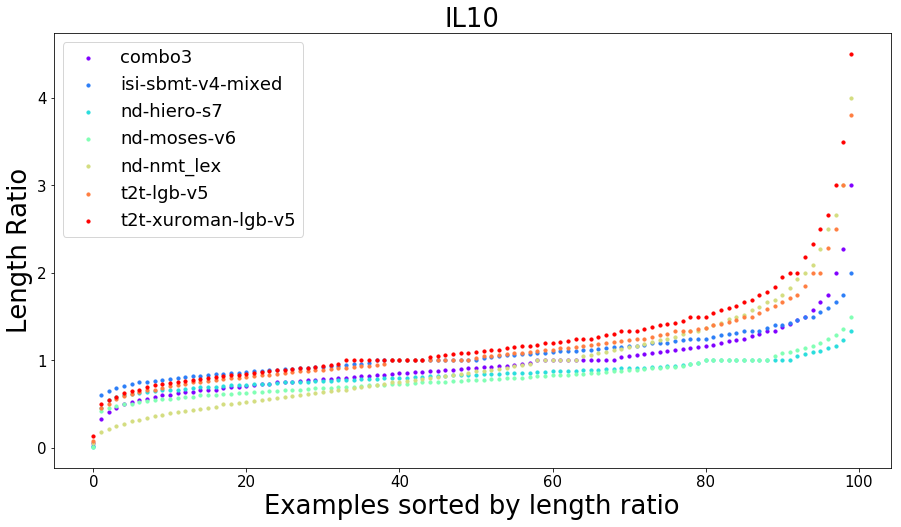

In [12]:
def visualize(df, title):
    sample_size = (len(df) // 100) + 1
    cap = 20
    mn, mx = 0.0, min(cap, df.max().max())
    names = list(df.keys())
    markers = ['b', '']
    total = len(df)
    markers = list(MarkerStyle().markers.keys())
    colors = colors = cm.rainbow(np.linspace(0, 1, len(names)))

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    for i, name in enumerate(names):
        data = [((j//sample_size), r) for j, r in enumerate(sorted(df[name])) 
            if j % sample_size == 0]
        x, y = zip(*data)
        ax1.scatter(x, y, s=10, c=colors[i], marker='o', label=name)


    plt.legend(loc='upper left');
    plt.title(title)
    plt.xlabel('Examples sorted by length ratio')
    plt.ylabel('Length Ratio')
    plt.show()

visualize(il9, 'IL9')
visualize(il10, 'IL10')

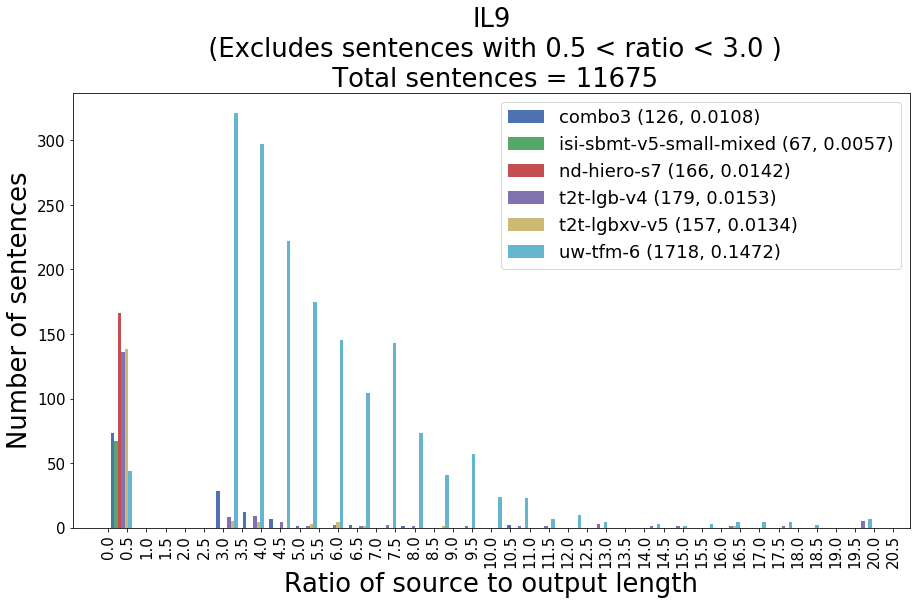

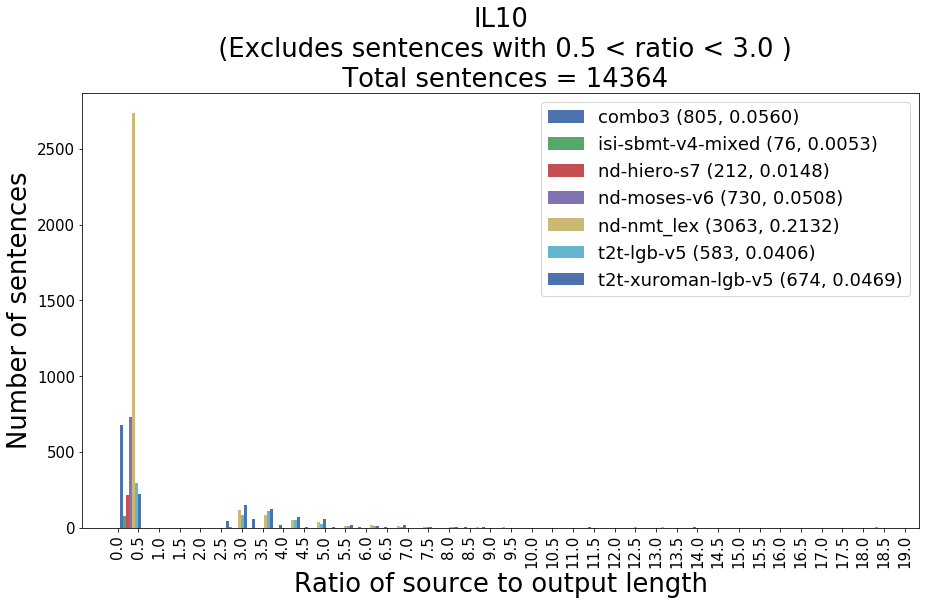

In [10]:
def visualize_hist(df, title, bins=30, ex_min=0.33, ex_max=3.0):
    max_val_cap = 20
    mn, mx = 0.0, min(max_val_cap, df.max().max())
    
    bins = np.linspace(mn, mx, bins)
    names = list(df.keys())

    
    def filter_range(data):
        return [min(x, max_val_cap) for x in data 
                if x <= ex_min or x >= ex_max]
    
    data = [filter_range(df[c]) for c in names]
    names = ['%s (%d, %.4f)'% (n, len(d), len(d)/len(df)) 
             for d, n in zip(data, names)]

    plt.hist(data, bins, label=names)
    plt.legend(loc='upper right')
    plt.xlabel('Ratio of source to output length')
    plt.ylabel('Number of sentences')
    sub_title = f'\n (Excludes sentences with {ex_min} < ratio < {ex_max} )'
    sub_title += f'\n Total sentences = {len(df)}'
    plt.title(title + sub_title)
    plt.xticks(np.arange(mn, mx+1, 0.5), rotation=90)
    plt.show()

visualize_hist(il9, 'IL9', ex_min=0.5)
visualize_hist(il10, 'IL10', ex_min=0.5)